# Business Problem 

# Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [479]:
import numpy as np
import pandas as pd
df1=pd.read_csv(r'C:\Users\chapp\Downloads\yulu.csv')
df1.head(5)

,"datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count"
0,"2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3..."
1,"2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8..."
2,"2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5..."
3,"2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3..."
4,"2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0..."


In [480]:
columns1=list(df1.columns)[0].split(",")
columns1

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

In [481]:
l=[]
for i in range(len(df1)):
    v=list(df1.loc[i,:])
    l.append(v[0].split(","))
    
df=pd.DataFrame(l,columns=columns1)
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [482]:
df.shape

(10886, 12)

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null object
holiday       10886 non-null object
workingday    10886 non-null object
weather       10886 non-null object
temp          10886 non-null object
atemp         10886 non-null object
humidity      10886 non-null object
windspeed     10886 non-null object
casual        10886 non-null object
registered    10886 non-null object
count         10886 non-null object
dtypes: object(12)
memory usage: 1020.6+ KB


In [484]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [485]:
df.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [486]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [487]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

<AxesSubplot:xlabel='weather', ylabel='count'>

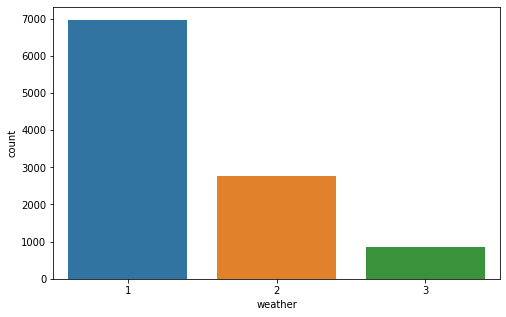

In [532]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.countplot(x='weather',data=df)

<AxesSubplot:xlabel='season', ylabel='count'>

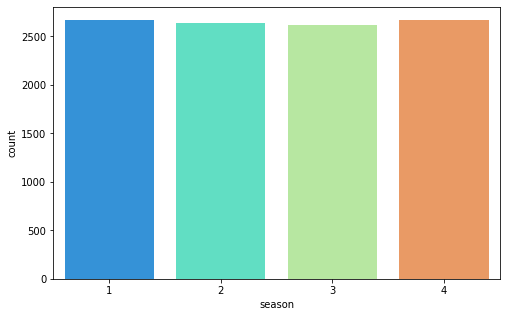

In [533]:
plt.figure(figsize=(8,5))
sns.countplot(x='season',data=df, palette='rainbow')

<AxesSubplot:xlabel='workingday', ylabel='count'>

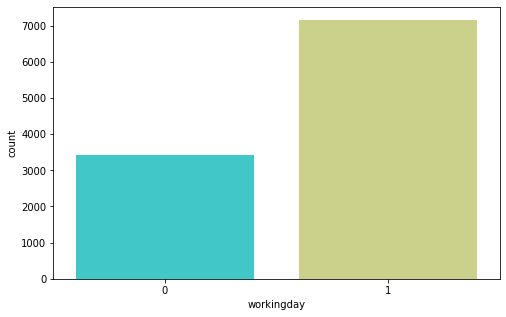

In [534]:
plt.figure(figsize=(8,5))
sns.countplot(x='workingday',data=df, palette='rainbow')

In [488]:
df['workingday']=df['workingday'].astype(int)
df['count']=df['count'].astype(int)
df['weather']=df['weather'].astype(int)

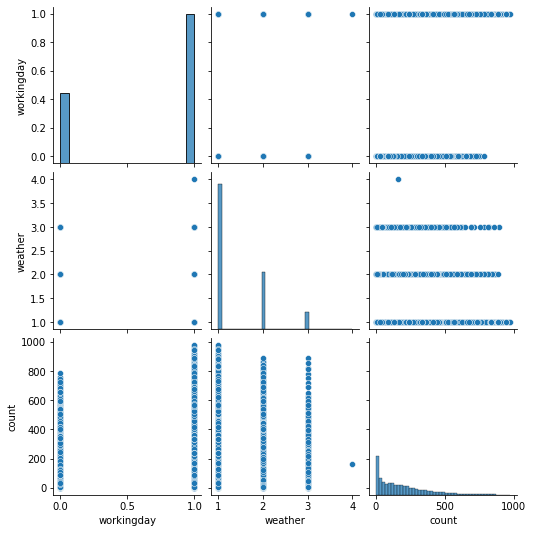

In [489]:
sns.pairplot(df)

# Outlier Treatment

<AxesSubplot:xlabel='workingday', ylabel='count'>

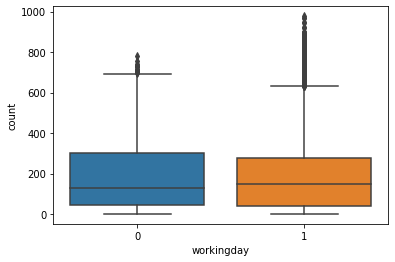

In [490]:
import seaborn as sns
sns.boxplot(x='workingday',y='count',data=df)

In [491]:
df.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [492]:
q1=df['count'].quantile(0.25)
q3=df['count'].quantile(0.75)
iqr=q3-q1

In [493]:
df=df[(df['count']>=q1-1.5*iqr) & (df['count']<=q3+1.5*iqr)]
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


<AxesSubplot:xlabel='workingday', ylabel='count'>

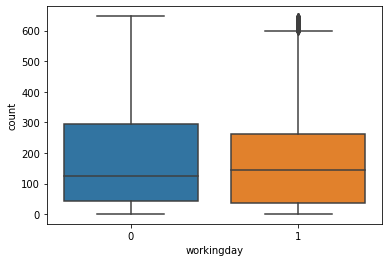

In [494]:
sns.boxplot(x='workingday',y='count',data=df)

# Two sample t test to check if weekday or weekend has an effect on on the count of cycles rented

In [495]:
#   Null hypothesis: Count on working days is equal to count on weekend
#   Alternate Hypothesis: Count on weekday is greater than on weekend

In [496]:
import random
random.seed(0)
weekdaydf=df[df['workingday']==1]['count'].sample(n=1000,replace=True)
weekenddf=df[df['workingday']==0]['count'].sample(n=1000,replace=True)

In [497]:
weekdaydf.std()

149.076081075902

In [498]:
weekenddf.std()

156.02222872031675

In [499]:
from scipy.stats import ttest_ind
ttest_ind(weekdaydf,weekenddf,equal_var=False)

Ttest_indResult(statistic=0.031360028172168326, pvalue=0.9749855570282924)

In [500]:
#  As p_val>0.05 , we fail to reject null hypothesis

# Checking is the demand for the cycles different in different weather

In [501]:
df['weather'].value_counts()

1    6965
2    2770
3     850
4       1
Name: weather, dtype: int64

In [502]:
df=df[~(df['weather']==4)]

In [503]:
w1=df[df['weather']==1]['count'].sample(850)
w2=df[df['weather']==2]['count'].sample(850)
w3=df[df['weather']==3]['count'].sample(850)

In [504]:
df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6965.0,187.329218,161.581066,1.0,45.0,153.0,287.0,647.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0


In [505]:
# Null Hypothesis:Demand is same for different weather
# Alternate Hypothesis: Demand is different for different weather
    

In [506]:
# conditions for ANOVA

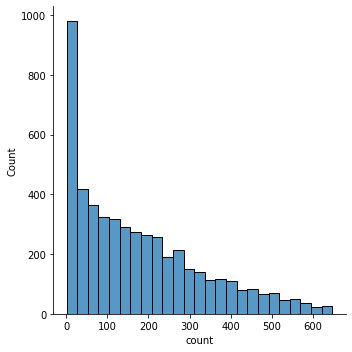

In [507]:
sns.displot(df['count'].sample(5000))

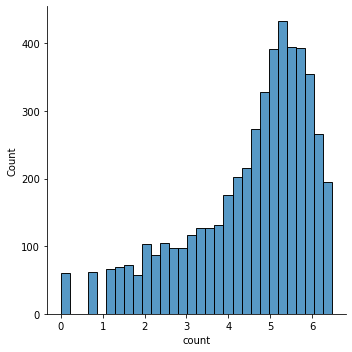

In [508]:
import numpy as np
sns.displot(np.log(df['count'].sample(5000)))

In [509]:
# null hypothesis: series is normal
# Alt hypothesis: series is not normal
from scipy.stats import shapiro 
w,pval=shapiro(df['count'].sample(5000))

In [510]:
pval

0.0

In [511]:
# reject null hypothesis

In [512]:
# Checking for equal variance
# Null Hypothesis: equal variance
# Alternate Hypothesis: not equal variance

# levene test

from scipy.stats import levene
test,pval=levene(w1,w2,w3)
pval

2.04358753790284e-20

In [513]:
# reject null Hypothesis

# Annova


In [514]:

from scipy.stats import f_oneway
test,pval=f_oneway(w1,w2,w3)

In [515]:
pval

1.362894279974102e-29

In [516]:
# Reject Null Hypothesis

In [517]:
df['season'].value_counts()

1    2669
4    2665
2    2634
3    2617
Name: season, dtype: int64

In [518]:
s1=df[df['season']=='1']['count'].sample(2617)
s2=df[df['season']=='2']['count'].sample(2617)
s3=df[df['season']=='3']['count'].sample(2617)
s4=df[df['season']=='4']['count'].sample(2617)

In [519]:
df.groupby(['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2669.0,112.775946,116.902627,1.0,24.0,78.0,161.0,644.0
2,2634.0,195.824981,166.371838,1.0,45.0,165.0,299.0,647.0
3,2617.0,210.651127,164.245975,1.0,60.0,185.0,324.0,647.0
4,2665.0,184.578236,154.793646,1.0,49.0,154.0,277.0,647.0


In [520]:
# Null Hypothesis:Demand is same for different Season
# Alternate Hypothesis: Demand is different for different Season

In [521]:

from scipy.stats import f_oneway
test,pval=f_oneway(s1,s2,s3,s4)

In [522]:
pval

2.489438470974697e-133

In [523]:
# Reject Null Hypothesis

# Chi square test to test weather is dependent on season

In [524]:
# Null Hypothesis: weather is dependent on season
# Alternate Hypothesis: weather is not dependent on season

In [525]:
crossdf=pd.crosstab(df['weather'],df['season'],margins=True, margins_name="Total")
crossdf

season,1,2,3,4,Total
weather,,,,,
1,1744,1721,1843,1657,6965
2,714,690,579,787,2770
3,211,223,195,221,850
Total,2669,2634,2617,2665,10585


In [526]:
import scipy.stats
data=[['1','1'] for i in range(1744)]+\
[['1','2'] for i in range(1721)]+\
[['1','3'] for i in range(1843)]+\
[['1','4'] for i in range(1657)]+\
[['2','1'] for i in range(714)]+\
[['2','2'] for i in range(690)]+\
[['2','3'] for i in range(579)]+\
[['2','4'] for i in range(787)]+\
[['3','1'] for i in range(211)]+\
[['3','2'] for i in range(223)]+\
[['3','3'] for i in range(195)]+\
[['3','4'] for i in range(221)]
df2=pd.DataFrame(data,columns=['weather','season'])
#significance level
alpha=0.05

#chisquare calculation
chisquare=0
rows=df['weather'].unique()
cols=df['season'].unique()
for i in cols:
    for j in rows:
        obs=crossdf[i][j]
        e=crossdf[i]['Total']*crossdf['Total'][j]/crossdf['Total']['Total']
        chisquare+=(obs-e)**2/e 
pval=1-scipy.stats.chi2.cdf(chisquare,(len(rows)-1)*(len(cols)-1))
print("P val:",pval)        

P val: 6.734426549748207e-08


In [527]:
#Reject Null Hypothesis

# Conclusion